#**Práctica 6b: Redes Neuronales Artificiales**

Curso: Inteligencia Artificial (UTC-INACAP)

Prof.: Carlos Toro N.

Primavera 2022

**Introducción**

En esta práctica implementaremos algunos modelos simples para resolver problemas de regresión y clasificación con redes neuronales. Además, observaremos como se comportan estos modelos ante el cambio de algunos hiperparámetros.

**PREVIO:** Importaciones necesarios para la práctica

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

# otras configuraciones
from keras.callbacks import EarlyStopping

versiones actuales de las librerías

In [ ]:
print(keras.__version__)
print(tf.__version__)

2.9.0
2.9.2


In [ ]:
!python --version # debiera estar actualizandose ahora en diciembre para soportar las nuevas actualizaciones de librerías como numpy o scikit learn

Python 3.8.15


Detalles GPU disponible en colab para los entrenamientos, recordar configurar en el Entorno de ejecución

In [ ]:
!nvidia-smi

Thu Dec  1 23:03:53 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P0    26W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## **1. Problemas de regresión con redes neuronales**

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

###**1.1 Problema de regresión simple**

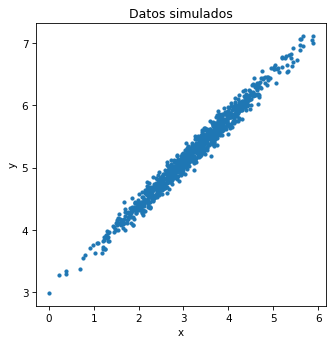

In [ ]:
# simulamos algunos datos con tendencia lineal y con algo de ruido gaussiano
np.random.seed(10)# para asegurar reproducibilidad
Ns    = 1000 # número de puntos a simular
x     = np.random.randn(Ns)
x     = x[:,np.newaxis]-x.min()# para agregar una dimensión a los datos, requerimos datos en la forma [n_samples,n_features], además dejamos positivo los números
noise = 0.1*np.random.randn(Ns,1)# desviación estándar 0.5 del ruido
y     = 0.7 * x + 3 + noise # datos tendencia lineal
#y     = 3 +  np.sin(0.5* np.pi * x) + noise #datos con tendencia más compleja
#y     = 0.7 * x + 3 +  np.sin(0.5* np.pi * x) + noise #datos con tendencia más compleja

plt.figure(figsize=(5,5),dpi=75)
plt.plot(x,y,'.')
plt.xlabel('x'); plt.ylabel('y')
plt.title('Datos simulados')
plt.show()

Dividimos el conjunto de datos en uno de entrenamiento, validación y test, el de validación extra lo usaremos para evaluar el desempeño del modelo durante el entrenamiento y detener su entrenamiento oportunamente. Podríamos usar el mismo conjunto de test pero sobre-estimaríamos el resultado final.

In [ ]:
# separamos el set de datos en entrenamiento y test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
 
print(f"El arreglo X_train tiene {X_train.shape[0]} muestras")
print(f"El arreglo X_test tiene {X_test.shape[0]} muestras")

El arreglo X_train tiene 800 muestras
El arreglo X_test tiene 200 muestras


**Preprocesamos los datos estandarizándolos:**


In [ ]:
#Standardization
from sklearn.preprocessing import StandardScaler
sc   = StandardScaler()#Para estandarizar las variable independiente
 
X_train      =sc.fit_transform(X_train) 
X_test       =sc.transform(X_test) #por qué no hacemos nuevamente un fit_transform?

Definamos una red neuronal simple de una capa oculta y experimentos con el número de neuronas para evaluar la mejor opción.

In [ ]:
# Modelo
N_neuronas   = 20# número de neuronas en la capa oculta para evaluar el modelo
modelo_RegNL = keras.Sequential([
                                  layers.Dense(N_neuronas, activation='relu', input_shape=[X_train.shape[1]]),
                                  layers.Dropout(0.3), 
                                  #layers.Dense(N_neuronas, activation='relu'),
                                  #layers.Dropout(0.3),        
                                  #layers.Dense(N_neuronas, activation='relu'),
                                  #layers.Dropout(0.3),    
                                                             
                                  layers.Dense(1,activation = 'linear')
                                ])

# Configuraciones de compilación del modelo ******
modelo_RegNL.compile(loss='mse', optimizer='Adam', metrics=['mse'])

modelo_RegNL.summary()# resumen del modelo

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 20)                40        
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


**Entrenando y evaluando el modelo:**

In [ ]:
# estrategia de detención temprana
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights = True)

#guardamos en historia las métricas y pérdida en loss y validación
BATCH_SIZE     = 100
EPOCAS         = 2000
historia       = modelo_RegNL.fit(X_train, y_train, epochs=EPOCAS, batch_size=BATCH_SIZE, 
                                  validation_split = 0.2, callbacks=[early_stopping])


Epoch 1/2000
7/7 [==============================] - 0s 24ms/step - loss: 28.1262 - mse: 28.1262 - val_loss: 28.8011 - val_mse: 28.8011
Epoch 2/2000
7/7 [==============================] - 0s 6ms/step - loss: 27.9358 - mse: 27.9358 - val_loss: 28.1728 - val_mse: 28.1728
Epoch 3/2000
7/7 [==============================] - 0s 6ms/step - loss: 27.3976 - mse: 27.3976 - val_loss: 27.5526 - val_mse: 27.5526
Epoch 4/2000
7/7 [==============================] - 0s 6ms/step - loss: 26.6165 - mse: 26.6165 - val_loss: 26.9512 - val_mse: 26.9512
Epoch 5/2000
7/7 [==============================] - 0s 6ms/step - loss: 26.2115 - mse: 26.2115 - val_loss: 26.3506 - val_mse: 26.3506
Epoch 6/2000
7/7 [==============================] - 0s 6ms/step - loss: 25.6428 - mse: 25.6428 - val_loss: 25.7508 - val_mse: 25.7508
Epoch 7/2000
7/7 [==============================] - 0s 6ms/step - loss: 24.8572 - mse: 24.8572 - val_loss: 25.1483 - val_mse: 25.1483
Epoch 8/2000
7/7 [==============================] - 0s 6ms/st

**Visualicemos el entrenamiento**

In [ ]:
print(historia.history.keys())

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


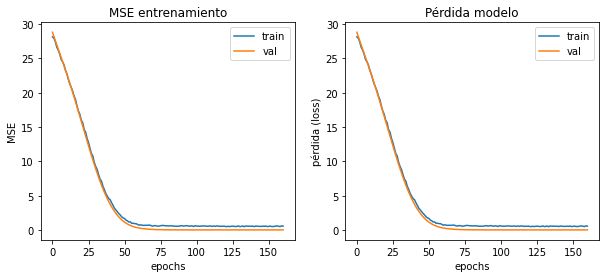

In [ ]:
# Gráficas del proceso de entrenamiento
# Gráfica MSE
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.plot(historia.history['mse'])
plt.plot(historia.history['val_mse'])
plt.title('MSE entrenamiento')
plt.ylabel('MSE'); plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper right')
 

# Gráfica de la función de pérdida
plt.subplot(1, 2, 2)
plt.plot(historia.history['loss'])
plt.plot(historia.history['val_loss'])
plt.title('Pérdida modelo')
plt.ylabel('pérdida (loss)'); plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

Resultados finales en entrenamiento y validación:


In [ ]:
print('Loss final en entrenamiento: ',historia.history['loss'][-1])
print('Loss final en validación: ',historia.history['val_loss'][-1])

Loss final en entrenamiento:  0.8355887532234192
Loss final en validación:  0.03953001648187637


**Evaluemos ahora en el conjunto de prueba:**

In [ ]:
# Evaluamos en conjunto de prueba
score =  modelo_RegNL.evaluate(X_test,y_test, verbose=0)

print('Loss en dataset de prueba: ',score[0])
print('MSE en dataset de prueba: ',score[1])# en este caso la pérdida y loss tienen la misma definición, por eso entregan los mismos resultados

Loss en dataset de prueba:  0.03305813670158386
MSE en dataset de prueba:  0.03305813670158386


**Cómo se comportará el modelo en datos simulados?**

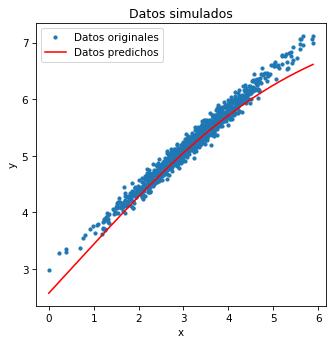

In [ ]:
#predicciones con el modelo entrenado
x_sim     = np.linspace(x.min(), x.max(),Ns)
x_sim     = x_sim[:,np.newaxis]   
x_sim_esc = sc.transform(x_sim) #aplicamos la misma transformación que en los datos de entrenamiento y prueba
 

# realizamos predicciones con el modelo sobre los datos simulados
y_pred    = modelo_RegNL.predict(x_sim_esc, verbose=0)
 
plt.figure(figsize=(5,5),dpi=75)
plt.plot(x,y,'.',x_sim,y_pred,'-r')
plt.xlabel('x'); plt.ylabel('y')
plt.title('Datos simulados')
plt.legend(["Datos originales","Datos predichos"])
plt.show()

**Preguntas:** 
1. ¿Qué se observa del proceso de entrenamiento? 
2. Implementar el entrenamiento sin usar detención temprana, qué sucede con las métricas en la última época.
3. Cambiar el número de neuronas de la capa oculta, experimentar y graficar el valor de la métrica MSE en el conjunto de entrenamiento, validación y prueba vs el número de neuronas. Comentar los resultados.
4. Qué sucede con el entrenamiento al usar las capas de dropout?
5. Agregar otra capa oculta y evaluar si mejoran las predicciones.
6. Describir los argumentos del procedimiento de detención temprana.

###**1.2 Problema de regresión multivariada**

En este ejemplo usaremos el conjunto de datos: [Diabetes](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset), disponible en el repositorio datasets de sci-kit learn. El conjunto de datos tiene por objetivo predecir la progresión de la enfermedad un año después de una medición de linea de base, esto en base a características como: edad, sexo, indice de masa corporal, presión sanguínea, otros. Analicemos el dataset antes de implementar un modelo con una red neuronal.

**Carguemos y pre-tratemos el dataset:**

In [ ]:
from sklearn.datasets import load_diabetes

# cargamos el dataset
diabetes = load_diabetes()
print(f"El dataset tiene los siguientes atributos: {diabetes.feature_names}")#nombres de los atributos
print(f"La dimensión de los datos es: {diabetes.data.shape}") #dimensiones de los datos
print(f"La dimensión de la variable target es: {diabetes.target.shape}")

# Cargar las variables a matriz de datos X y variable objetivo y
X = diabetes.data
Y = diabetes.target

Y = Y[:,np.newaxis]
print(f"La nueva dimensión de la variable target es: {Y.shape}")
 #Agregamos esa dimensión para que los datos target tengan dimension [n_samples, 1], necesario al usar sklearn

El dataset tiene los siguientes atributos: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
La dimensión de los datos es: (442, 10)
La dimensión de la variable target es: (442,)
La nueva dimensión de la variable target es: (442, 1)


División del dataset y pre-procesamiento

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# separamos el set de datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

# estandarización de variables
sc   = StandardScaler()#Para estandarizar las variable independiente
 
X_train   = sc.fit_transform(X_train) 
X_test    = sc.transform(X_test) 


**Definamos el modelo, configuremos el entrenamiento y entrenemoslo:**
 

In [ ]:
# Modelo
modelo_diabetes = keras.Sequential([
                                   layers.Dense(128, activation='relu', input_shape=[X_train.shape[1]]),
                                   
                                   layers.Dropout(0.3), 
                                   layers.Dense(64, activation='relu'),
                                    
                                   layers.Dropout(0.3), 
                                   layers.Dense(32, activation='relu'),
 
                                   layers.Dropout(0.3),                                    
                                   layers.Dense(1,activation = 'linear')
                                ])

# Configuraciones de compilación del modelo ******
modelo_diabetes.compile(loss='mse', optimizer='Adam', metrics=['mse'])

# estrategia de detención temprana
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights = True)

#guardamos en historia las métricas y pérdida en loss y validación
BATCH_SIZE     = 100
EPOCAS         = 2000
historia       = modelo_diabetes.fit(X_train, y_train, epochs=EPOCAS, batch_size=BATCH_SIZE, 
                                  validation_split = 0.2, callbacks=[early_stopping], verbose = 0)#verbose = 0 evita que se despliegue el histórico durante el entrenamiento

**Visualización de resultados:**

Gráfico función de pérdida

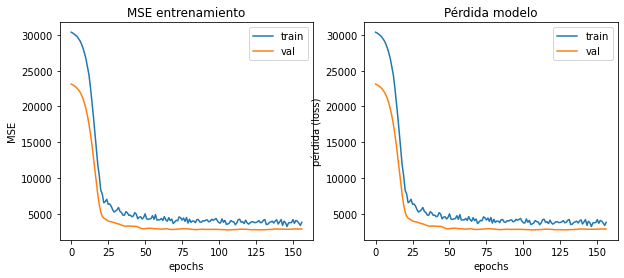

In [ ]:
# Gráficas del proceso de entrenamiento
# Gráfica MSE
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.plot(historia.history['mse'])
plt.plot(historia.history['val_mse'])
plt.title('MSE entrenamiento')
plt.ylabel('MSE'); plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper right')
 

# Gráfica de la función de pérdida
plt.subplot(1, 2, 2)
plt.plot(historia.history['loss'])
plt.plot(historia.history['val_loss'])
plt.title('Pérdida modelo')
plt.ylabel('pérdida (loss)'); plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
# Evaluamos en conjunto de prueba
score =  modelo_diabetes.evaluate(X_test,y_test, verbose=0)

print('MSE en dataset de prueba: ',score[1]) 

MSE en dataset de prueba:  2642.10546875


Notar que los cálculos de la función de pérdida y métrica mse son sobre los datos estandarizados en este caso, por lo que hay que tener cuidado en su interpretación en términos de las unidades de las variables originales.

Gráfico de dispersión entre variable de edad real vs predicha

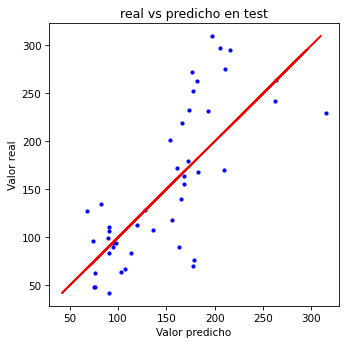

In [ ]:
y_predicho = modelo_diabetes.predict(X_test, verbose = 0) 

plt.figure(figsize=(5,5),dpi=75)
plt.plot(y_predicho, y_test ,'.b')
plt.plot(y_test,y_test,'-r')
plt.xlabel('Valor predicho'); plt.ylabel('Valor real')
plt.title('real vs predicho en test')
plt.show()

Ejercicio: 
- Calcular las métricas de RMSE y R^2 en el conjunto de datos de prueba.

## **2. Problemas de clasificación con redes neuronales**

El [conjunto de datos](https://archive.ics.uci.edu/ml/datasets/heart+Disease) que usaremos es un archivo CSV con 303 filas (**muestras**). Cada fila contiene información acerca de un paciente (**una muestra**), y cada columna describe un atributo de un paciente (**una característica**). Usaremos las caraterísticas para predecir si un paciente tiene una enfermedad cardiaca o no (**clasificación binaria**)

In [ ]:
import pandas as pd

In [ ]:
file_url  = "https://raw.githubusercontent.com/kb22/Heart-Disease-Prediction/master/dataset.csv"
data      = pd.read_csv(file_url)
print(f"El conjunto de datos tiene {data.shape[0]} muestras y {data.shape[1]} características o variables")
print("Algunas muestras de los datos son:\n")
data.head()

El conjunto de datos tiene 303 muestras y 14 características o variables
Algunas muestras de los datos son:



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Cuántos valores de cada categoría tenemos?

In [ ]:
data['target'].value_counts()

**Preparemos los datos para entrenamiento:**

In [ ]:
X   = data.drop(['target'],axis = 1)
Y   = data['target']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# separamos el set de datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# estandarización de variables
sc        = StandardScaler()#Para estandarizar las variable independiente
X_train   = sc.fit_transform(X_train) 
X_test    = sc.transform(X_test) 

#Forma de los datasets finales
print(f"El conjunto de entrenamiento tiene una dimensión de {X_train.shape}")
print(f"El conjunto de prueba tiene una dimensión de {X_test.shape}")
print(f"El conjunto de pruebas tiene {sum(y_test==1)} muestras para la clase 1 y {sum(y_test==0)} muestras para la clase 0")

El conjunto de entrenamiento tiene una dimensión de (242, 13)
El conjunto de prueba tiene una dimensión de (61, 13)
El conjunto de pruebas tiene 32 muestras para la clase 1 y 29 muestras para la clase 0


**Definamos el modelo para el problema de clasificaión, configuremos el entrenamiento y entrenemos**

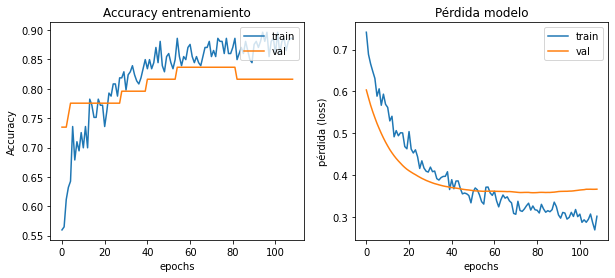

In [ ]:
# Modelo
modelo_heart = keras.Sequential([
                                   layers.Dense(32, activation='relu', input_shape=[X_train.shape[1]]),
                                   
                                   #layers.Dropout(0.3), 
                                   #layers.Dense(16, activation='relu'),# descomentar para evaluar si mejora el rendimiento
 
                                   layers.Dropout(0.3),                                    
                                   layers.Dense(1,activation = 'sigmoid')# Usamos una función sigmoidal en la salida yaque es un problema de clasificación binario
                                ])

# Configuraciones de compilación del modelo ******
modelo_heart.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

# estrategia de detención temprana
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights = True)

#guardamos en historia las métricas y pérdida en loss y validación
BATCH_SIZE     = 50
EPOCAS         = 500
historia       = modelo_heart.fit(X_train, y_train, epochs=EPOCAS, batch_size=BATCH_SIZE, 
                                  validation_split = 0.2, callbacks=[early_stopping], verbose = 0)# verbose = 0 hace que no se despliegue la información del entrenamiento

# Gráficas del proceso de entrenamiento
# Gráfica MSE
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.plot(historia.history['accuracy'])
plt.plot(historia.history['val_accuracy'])
plt.title('Accuracy entrenamiento')
plt.ylabel('Accuracy'); plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper right')
 

# Gráfica de la función de pérdida
plt.subplot(1, 2, 2)
plt.plot(historia.history['loss'])
plt.plot(historia.history['val_loss'])
plt.title('Pérdida modelo')
plt.ylabel('pérdida (loss)'); plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper right')
plt.show()                                 

In [ ]:
print("Evaluemos el modelo en los datos de entreamiento")
score = modelo_heart.evaluate(X_train, y_train, verbose=0)
print("score %s: %.2f%%" % (modelo_heart.metrics_names[1], score[1]*100))

print("Evaluemos el modelo en los datos de prueba")
score = modelo_heart.evaluate(X_test, y_test, verbose=0)
print("score %s: %.2f%%" % (modelo_heart.metrics_names[1], score[1]*100))

**Matriz de confusión en datos de prueba:**

In [ ]:
y_pred = modelo_heart.predict(X_test, verbose = 0)#valores predichos con el modelo
y_pred = (y_pred>0.5).astype('int32') #binarización de la salida, yaque la sigmoidal entrega valores entre 0 y 1 a la salida de la red.


In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['0','1'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

## **3. Ejercicios Extra**

**E.1** Implementar la estrategia de validación cruzada simple para encontrar el número óptimo de neuronas en un modelo de red neuronal con una sola capa oculta, para resolver un problema de clasificacón o regresión.

In [ ]:
#Código aquí

**E.2** Proponer una red neuronal para los datos de estimación de fuerza de compresión de concreto estudiados en el práctico de Pandas, comparar con los resultados obtenidos con un modelo de regresión multivariada.


In [ ]:
#Código aquí